### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [9]:
import matplotlib.pyplot as plt

lojas = pd.concat([loja, loja2, loja3, loja4])

loja['loja'] = 'loja1'
loja2['loja'] = 'loja2'
loja3['loja'] = 'loja3'
loja4['loja'] = 'loja4'
lojas = pd.concat([loja, loja2, loja3, loja4])

lojas['faturamento'] = lojas['Preço'] + lojas['Frete']

faturamento_por_loja = lojas.groupby("loja")["faturamento"].sum()


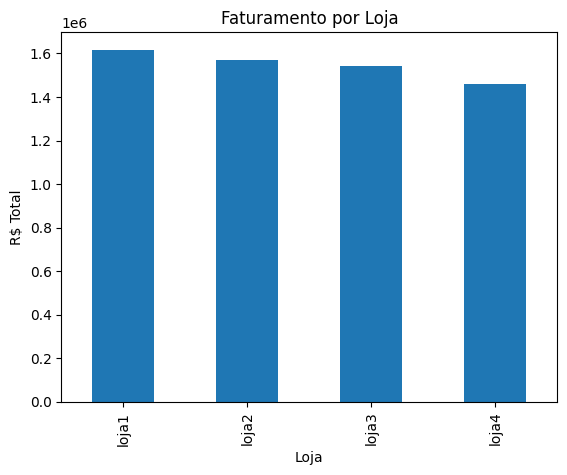

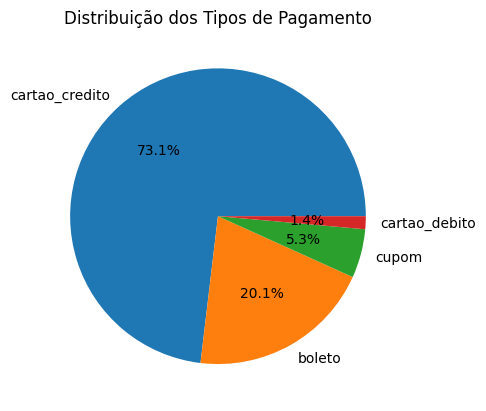

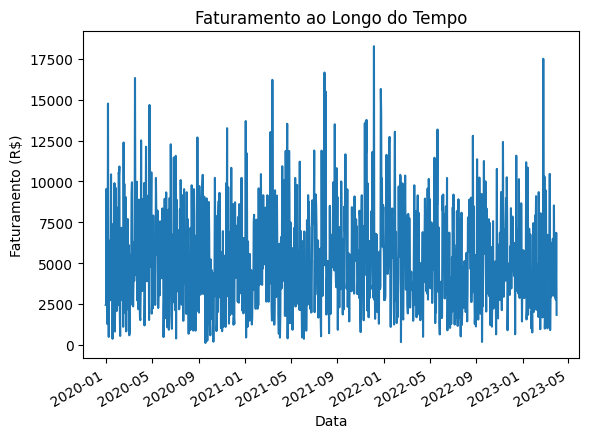

In [28]:
faturamento_por_loja.plot(kind="bar", title="Faturamento por Loja", ylabel="R$ Total", xlabel="Loja")
plt.show()

print('')
tipos_pagamento = lojas["Tipo de pagamento"].value_counts()

tipos_pagamento.plot(kind="pie", autopct="%1.1f%%", title="Distribuição dos Tipos de Pagamento")
plt.ylabel("")
plt.show()

print('')

lojas["Data da Compra"] = pd.to_datetime(lojas["Data da Compra"], dayfirst=True)
faturamento_tempo = lojas.groupby("Data da Compra")["faturamento"].sum().sort_index()

faturamento_tempo.plot(kind="line", title="Faturamento ao Longo do Tempo", ylabel="Faturamento (R$)", xlabel="Data")
plt.show()


# 2. Vendas por Categoria


In [16]:
vendas_por_categoria = lojas["Categoria do Produto"].value_counts()


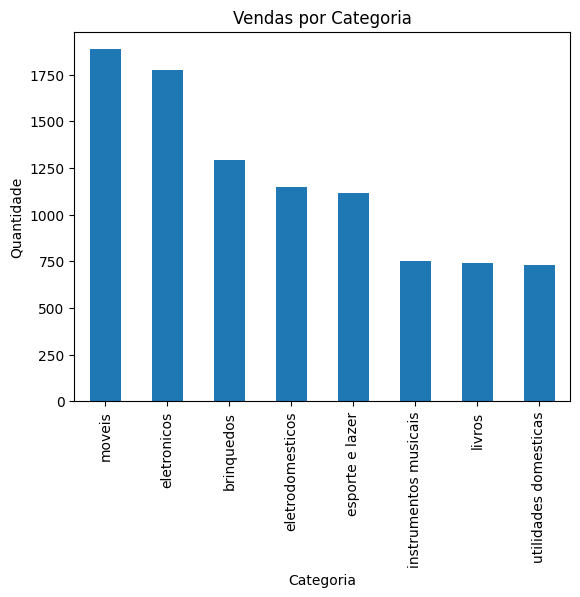

In [15]:
vendas_por_categoria.plot(kind="bar", title="Vendas por Categoria", ylabel="Quantidade", xlabel="Categoria")
plt.show()

# 3. Média de Avaliação das Lojas

In [17]:
media_avaliacao = lojas.groupby("loja")["Avaliação da compra"].mean()

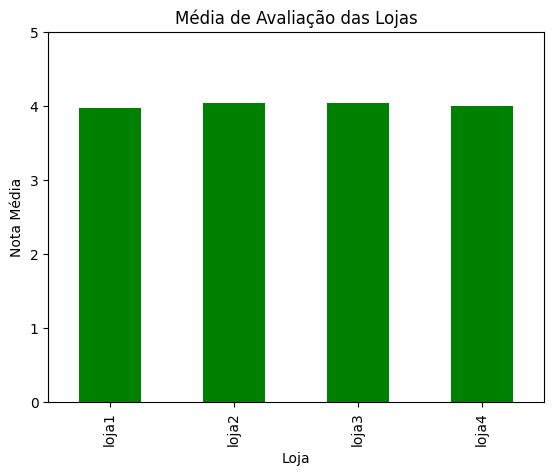

In [18]:
media_avaliacao.plot(kind="bar", title="Média de Avaliação das Lojas", ylabel="Nota Média", xlabel="Loja", color="green")
plt.ylim(0, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [19]:
produtos_vendidos = lojas["Produto"].value_counts()

mais_vendidos = produtos_vendidos.head(5)
menos_vendidos = produtos_vendidos.tail(5)

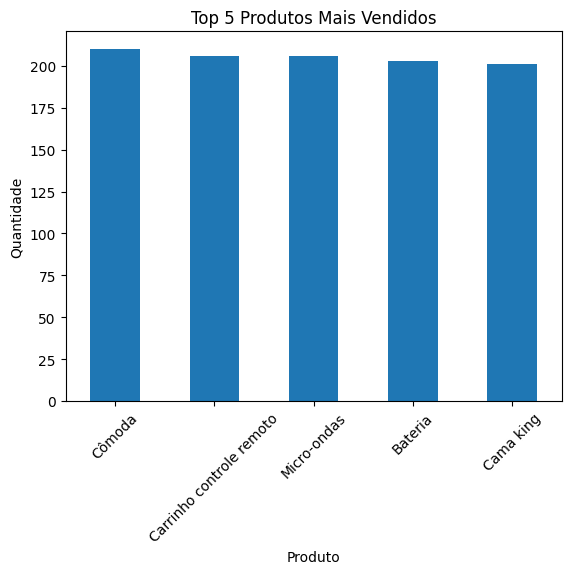

In [24]:
mais_vendidos.plot(kind="bar", title="Top 5 Produtos Mais Vendidos", xlabel="Produto", ylabel="Quantidade")
plt.xticks(rotation=45)
plt.show()

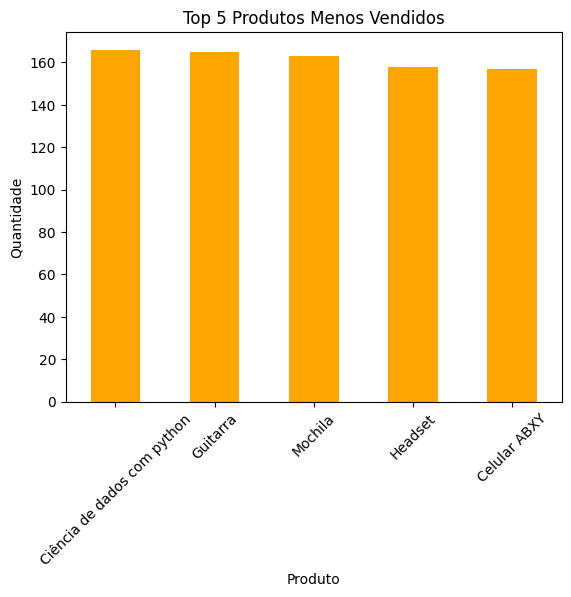

In [25]:
menos_vendidos.plot(kind="bar", title="Top 5 Produtos Menos Vendidos", xlabel="Produto", ylabel="Quantidade", color="orange")
plt.xticks(rotation=45)
plt.show()

# 5. Frete Médio por Loja


In [26]:
frete_medio = lojas.groupby("loja")["Frete"].mean()

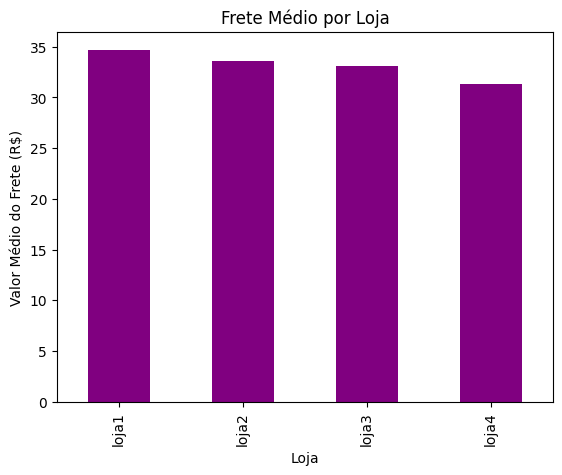

In [27]:
frete_medio.plot(kind="bar", title="Frete Médio por Loja", ylabel="Valor Médio do Frete (R$)", xlabel="Loja", color="purple")
plt.show()

# 📊 Relatório de Análise de Vendas das Lojas

Neste relatório, analisamos os dados de quatro lojas virtuais com base em diversas métricas de desempenho. A seguir, apresentamos as principais conclusões a partir dos gráficos gerados.

---

## 🧾 1. Faturamento por Loja

A análise de faturamento mostrou diferenças relevantes entre as lojas:

- A **Loja 1** foi a que teve o maior faturamento total.
- A **Loja 4** apresentou o menor volume financeiro, o que pode indicar baixo desempenho ou poucos produtos vendidos.

---

## 🧾 2. Vendas por Categoria

As categorias com maior número de vendas foram:

- **moveis** e **Eletrônicos**, que dominaram o volume de vendas.
- **livros** e **utilidades domésticas** tiveram menor participação.

Esses dados podem ajudar na definição do mix de produtos que o Sr. João pretende vender.

---

## 🧾 3. Avaliação Média das Lojas

As notas médias atribuídas pelos clientes indicam a satisfação com as compras:

- A **Loja 2** obteve a melhor média de avaliação.
- A **loja 1**, com a menor média precisa ser analisada quanto ao atendimento, qualidade dos produtos ou problemas no pós-venda.

---

## 🧾 4. Produtos Mais e Menos Vendidos

- Entre os produtos mais vendidos estão [**comoda, carrinho de controle remoto, micro ondas, bateria, cama king**].
- Os menos vendidos incluem [**ciência da computação com python ,guitarra, mochila, headset, celular ABXY**], o que pode indicar falta de interesse ou preços elevados.

---

## 🧾 5. Frete Médio por Loja

O custo médio de frete variou entre as lojas:

- A **Loja 4 com o menor frete médio** pode atrair mais clientes por oferecer preços finais mais competitivos.
- Fretes elevados como o da loja 1 e loja 2 podem impactar negativamente as conversões.

---

## ✅ Conclusão e Recomendação

Com base nas análises acima, considerando:

- Faturamento total
- Qualidade (avaliações)
- Custo logístico (frete)
- Preferência de categorias

Recomendamos que o Sr. João venda a Loja 4, pois ela apresenta o pior desempenho geral: menor faturamento, avaliação apenas mediana e baixa relevância nas principais categorias de venda.

Com isso, ele poderá focar seus esforços nas lojas mais lucrativas e bem avaliadas, maximizando suas chances de sucesso no ambiente digital.